# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [365]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [366]:
### Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [367]:
## Build partial query
query_url = f"{url}appid={weather_api_key}&units={units}&q="
endpoint= query_url.format('url', 'weather_api_key')

In [368]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=12dd3c3f7d06a48bd86ff9a1e968c85c&units=imperial&q='

In [369]:
endpoint

'http://api.openweathermap.org/data/2.5/weather?appid=12dd3c3f7d06a48bd86ff9a1e968c85c&units=imperial&q='

## Generate Cities List

In [112]:
# List for holding lat_lngs and cities
#lat_lngs = []
#lngs = []
cities = []
#cloudiness = []
#country = []
#date = []
#humidity = []
#max_temp = []
#wind_speed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [370]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lng = []

In [371]:
cities_df = pd.read_csv("../output_data/cities.csv")
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [372]:
index_counter = 0
set_counter = 1
print(f"Beginning Data Retrieval \n.........................")
# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    # get city name from df
    city_type = row ['City']
    # add keyword to params dict
    params['keyword'] = city_type
    # assemble url and make API request
    response = requests.get(endpoint, params=params).json()
    # extract results
   #results = response['results']
    try:
        print(f"Processing Record {index_counter} of set {set_counter} | {city_type}")
        cities_dfloc[index, 'City'] = response[0]['City']
        cities_dfloc[index, 'Lat'] = response[0]['Lat']
        cities_dfloc[index, 'Lng'] = response[0]['lngs']
        cities_dfloc[index, 'Max Temp'] = response[0]['Max Temp']
        cities_dfloc[index, 'Humidity'] = response[0]['Humidity']
        cities_dfloc[index, 'Cloudiness'] = response[0]['Cloudiness']
        cities_dfloc[index, 'Wind Speed'] = response[0]['Wind Speed']
        cities_dfloc[index, 'Country'] = response[0]['Country']
        cities_dfloc[index, 'Date'] = response[0]['Date']
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
    except(KeyError, IndexError):
        print("City not found. Skipping....")

Beginning Data Retrieval 
.........................
Processing Record 0 of set 1 | ostrovnoy
City not found. Skipping....
Processing Record 0 of set 1 | mahebourg
City not found. Skipping....
Processing Record 0 of set 1 | qaanaaq
City not found. Skipping....
Processing Record 0 of set 1 | zhuhai
City not found. Skipping....
Processing Record 0 of set 1 | cape town
City not found. Skipping....
Processing Record 0 of set 1 | atuona
City not found. Skipping....
Processing Record 0 of set 1 | flinders
City not found. Skipping....
Processing Record 0 of set 1 | opuwo
City not found. Skipping....
Processing Record 0 of set 1 | tiksi
City not found. Skipping....
Processing Record 0 of set 1 | pushkinskiye gory
City not found. Skipping....
Processing Record 0 of set 1 | aykhal
City not found. Skipping....
Processing Record 0 of set 1 | castro
City not found. Skipping....
Processing Record 0 of set 1 | avarua
City not found. Skipping....
Processing Record 0 of set 1 | saskylakh
City not found.

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [373]:
weather_df = pd.DataFrame(cities_df)

In [374]:
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [375]:
weather_df.count()

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [376]:
weather_df.to_csv("weather.csv", encoding='utf-8', index=False)

In [377]:
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [378]:
high_humid = weather_df.loc[weather_df["Humidity"] > 100]
#high_humid.reset_index(inplace=True)

In [379]:
#  Get the indices of cities that have humidity over 100%.
high_humid['Humidity'].value_counts(dropna=False)

290    1
Name: Humidity, dtype: int64

In [380]:
#high_humid_index = high_humid.set_index("Humidity")
high_humid1 = weather_df.loc[weather_df['Humidity'] == 290]
high_humid1

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
129,129,paita,0,PE,1558378778,290,-5.09,-81.11,62.6,17.22


In [381]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [382]:
clean_city_data = weather_df.drop(weather_df.index[129])
clean_city_data.reset_index(inplace=False)
clean_city_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [383]:
clean_city_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


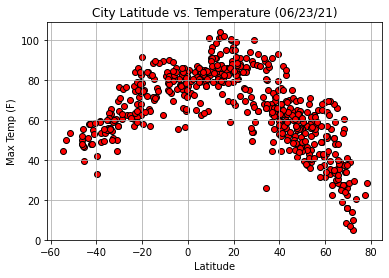

<Figure size 720x576 with 0 Axes>

In [384]:
plt.grid(True)
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.figure(figsize=(10,8))
plt.savefig("Latitude vs Temperature (%).png")
plt.show()


## Latitude vs. Humidity Plot

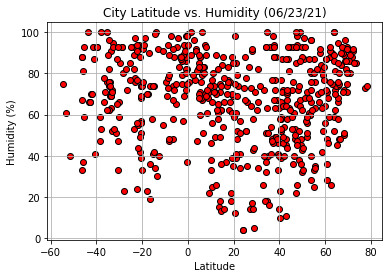

<Figure size 720x576 with 0 Axes>

In [385]:
plt.grid(True)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.figure(figsize=(10,8))
plt.savefig("Latitude vs Humidity (%).png")
plt.show()
#plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')

## Latitude vs. Cloudiness Plot

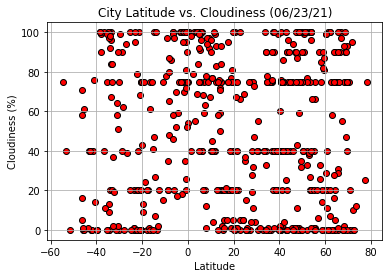

<Figure size 720x576 with 0 Axes>

In [386]:
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.figure(figsize=(10,8))
plt.savefig("Latitude vs Cloudiness (%).png")
plt.show()

## Latitude vs. Wind Speed Plot

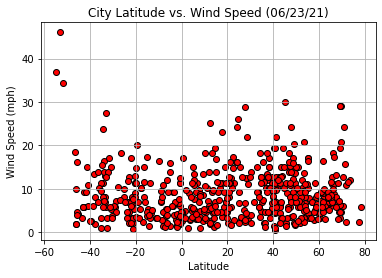

<Figure size 720x576 with 0 Axes>

In [387]:
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.figure(figsize=(10,8))
plt.savefig("Latitude vs Wind Speed (mph).png")
plt.show()

## Linear Regression

In [388]:
northern_hem = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) >= 0.0]
northern_hem.reset_index(inplace=True)

In [389]:
southern_hem = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) <= 0.0]
southern_hem.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [391]:
from scipy import stats
# Perform a linear regression on temperature vs. latitude
x_values_nh = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values_nh = pd.to_numeric(northern_hem['Max Temp']).astype(float)

x_values_sh = pd.to_numeric(southern_hem["Lat"]).astype(float)
y_values_sh = pd.to_numeric(southern_hem["Max Temp"]).astype(float)

y_values_nh_hum = pd.to_numeric(northern_hem['Humidity']).astype(float)
y_values_sh_hum = pd.to_numeric(southern_hem["Humidity"]).astype(float)

y_values_nh_cloud = pd.to_numeric(northern_hem['Cloudiness']).astype(float)
y_values_sh_cloud = pd.to_numeric(southern_hem["Cloudiness"]).astype(float)

y_values_nh_wind = pd.to_numeric(northern_hem['Wind Speed']).astype(float)
y_values_sh_wind = pd.to_numeric(southern_hem["Wind Speed"]).astype(float)
def plotLinearRegression(x_values, y_values, x_label, y_label, hem):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # line_eq = f"y={round(slope,2}x + {round(intercept, 2)}"
    #print(line_eq)
    #print(regress_values)
    # Create Plot
    #plt.title('Northen Hemisphere- '+ y_label + ' vs. ' + x_label )#+ '(' +  time.strftime("%x") + ')')
    plt.scatter(x_values,y_values)
    plt.title(hem + y_label + ' vs. ' + x_label  + '(' +  time.strftime("%x") + ')')
    plt.plot(x_values,regress_values,"r-")
    if (hem == 'Northen Hemisphere'):
        
        plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
        # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.title('Northen Hemisphere- ' + y_label + ' vs. ' + x_label )#+ '(' +  time.strftime("%x") + ')')
   # plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.6644951847801386


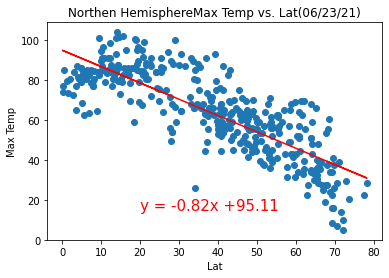

In [392]:
plotLinearRegression(x_values_nh, y_values_nh, 'Lat', 'Max Temp', 'Northen Hemisphere')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5880057276369802


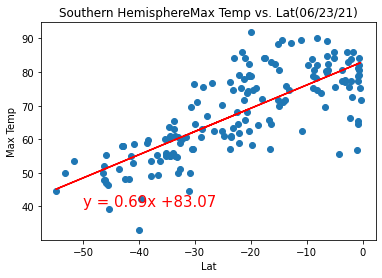

In [393]:
plotLinearRegression(x_values_sh, y_values_sh, 'Lat', 'Max Temp', 'Southern Hemisphere')

In [394]:
# 1) Both plots show a positive linear regression
# 2) The plot shows the temperature increases as one moves closer to the equator for the Southern Hemisphere and vice versa for the Northern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010729512501511098


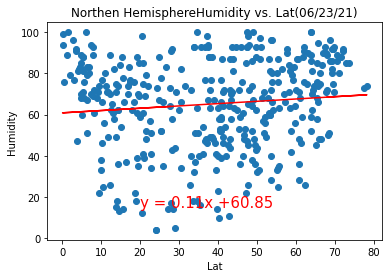

In [395]:
plotLinearRegression(x_values_nh, y_values_nh_hum, 'Lat', 'Humidity', 'Northen Hemisphere')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01299355637910035


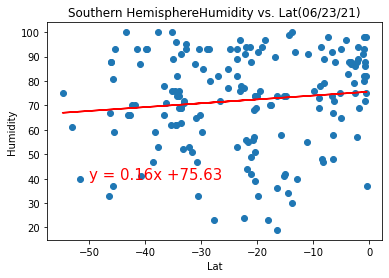

In [396]:
plotLinearRegression(x_values_sh, y_values_sh_hum, 'Lat', 'Humidity', 'Southern Hemisphere')

In [397]:
# 1) The linear regression doesn't show much correlation between the 2 data points
# 2) The humidity of a city is not based on the latitude of the city

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.007627485925231671


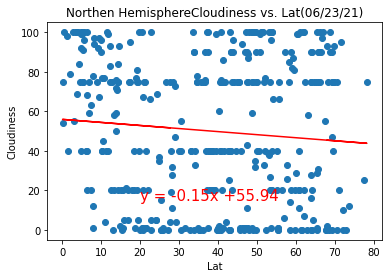

In [398]:
plotLinearRegression(x_values_nh, y_values_nh_cloud, 'Lat', 'Cloudiness', 'Northen Hemisphere')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05294530205984339


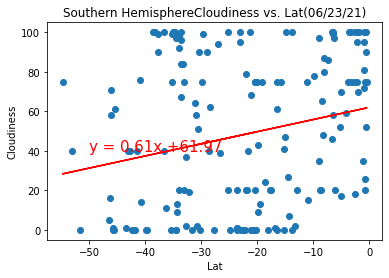

In [399]:
plotLinearRegression(x_values_sh, y_values_sh_cloud, 'Lat', 'Cloudiness', 'Southern Hemisphere')

In [400]:
# 1) There is no correlation between the 2 data points
# 2) The wind cloudiness cannot be determined based of the latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011478610492563561


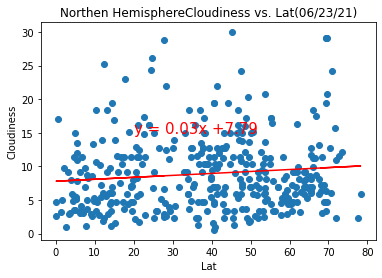

In [401]:
plotLinearRegression(x_values_nh, y_values_nh_wind, 'Lat', 'Cloudiness', 'Northen Hemisphere')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11293389416296586


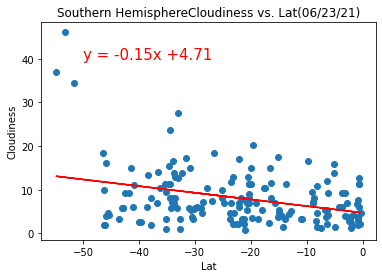

In [402]:
plotLinearRegression(x_values_sh, y_values_sh_wind, 'Lat', 'Cloudiness', 'Southern Hemisphere')

In [403]:
# 1) There is no correlation between the wind speed and latitude
# 2) The wind speed cannot be determined based on the latitude of the city

In [404]:
import os
os.getcwd()

'C:\\Users\\vaab2\\OneDrive\\Desktop\\DataAnalyticsBootcamp\\02-Homework\\06-Python-APIs\\Instructions\\starter_code'